
# Diseño de software

----

## Modelo de objetos de Python + Composición de objetos

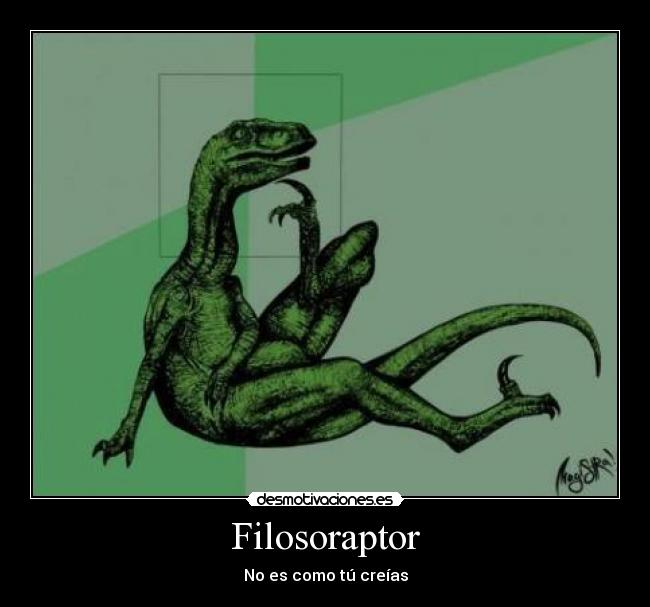

<small><b>Source:</b> <a href="https://dbader.org/blog/python-dunder-methods">https://dbader.org/blog/python-dunder-methods</a></small>

## Python Data types
-----

- Parte de la promesas incumplidas que tengo es explicar por que esto

In [1]:
[1, 2, 3] + [4, 5, 6]

[1, 2, 3, 4, 5, 6]

Funciona distinto de esto

In [2]:
import numpy as np

np.array([1, 2, 3]) + [4, 5, 6]

array([5, 7, 9])

## Python Data types
-----

al igual que estas dos cosas

In [3]:
np.array([1, 2, 3]) * 2

array([2, 4, 6])

In [4]:
[1, 2, 3] * 2

[1, 2, 3, 1, 2, 3]

## Python Data types
-----
O una de estas directamente no funciona

In [5]:
np.array([1, 2, 3]) + 1

array([2, 3, 4])

In [6]:
[1, 2, 3] + 1

TypeError: can only concatenate list (not "int") to list

### Dunders
----

- Por que funciona esto?

In [7]:
len([1])
 

1

In [8]:
1 + 17

18

In [1]:
def foo():
    return "hello"

foo()

'hello'

### Dunders
----

Vamos con el ejemplos simple

In [12]:
class HasLen:
    def __init__(self, l):
        self.l = l
    def __len__(self):
        return self.l

In [14]:
foo = HasLen(l=45454542)
len(foo)

45454542

In [15]:
foo.__len__()

45454542

### Dunders
----

- En Python, los métodos especiales son un conjunto de métodos predefinidos que se puede usar para enriquecer las clases. Son fáciles de reconocer porque comienzan y terminan con guiones bajos dobles, por ejemplo `__init__` o `__str__`.

- Como es cansador decir  *under-under-method-under-under* la comunidad empezo a decirles **dunder** contraccion de *double-under*.

- Los métodos Dunder le permiten emular el comportamiento de los tipos integrados. Por ejemplo, para obtener la longitud de una cadena puede llamar a `len('cadena')`.

### Dunders
----

Inicialización 

In [1]:
class Account:
    """A simple account class"""

    def __init__(self, owner, amount=0):
        """This is the constructor that lets us create
        objects from this class.
        
        """
        self.owner = owner
        self.amount = amount
        self._transactions = []
        
    def add_transaction(self, amount):
        if not isinstance(amount, int):
            raise ValueError('please use int for amount')
        self._transactions.append(amount)
        
    @property
    def balance(self):
        return self.amount + sum(self._transactions)

### Dunders
----

Representación

In [2]:
str(Account("juan", 100))

'<__main__.Account object at 0x7f031c20aad0>'

In [3]:
Account.mro()

[__main__.Account, object]

In [4]:
class Account(Account):
 
    def __repr__(self):
        return f'{type(self).__name__}({self.owner}, {self.amount})'

    def __str__(self):
        return f'Account of {self.owner} with starting amount: {self.amount}'

In [5]:
acc = Account('bob', 10)
acc  # repr(acc)

Account(bob, 10)

In [6]:
str(acc)

'Account of bob with starting amount: 10'

### Dunders
----

Iteración

In [7]:
class Account(Account):

    def __len__(self):
        return len(self._transactions)

    def __getitem__(self, position):
        return self._transactions[position]
    
    def __setitem__(self, pos, v):
        self._transactions[pos] = v

In [8]:
acc = Account('bob', 10)
acc.add_transaction(20)
acc.add_transaction(-10)
acc.add_transaction(50)
acc.add_transaction(-20)
acc.add_transaction(30)

acc.balance

80

### Dunders
----

Iteración

In [34]:
len(acc)

5

In [9]:
acc[2]

50

In [39]:
acc.balance

123

In [35]:
for t in acc:
    print(t)

20
-10
50
-20
30


In [39]:
class A:
    def __getitem__(self, i):
        return   "hola beja"
    
A()[12] = "zaeraza"

TypeError: 'A' object does not support item assignment

### Dunders
----

Comparación

Los métodos son siempre con `__` al comienzo y al final: `ge, gt, le, lt, eq, ne`
Pero a partir de `__eq__` y algun otro se pueden completar automaticamente los demas con un decorador.

In [41]:
import functools

@functools.total_ordering
class Account(Account):
    # ... (see above)

    def __eq__(self, other):
        return self.balance == other.balance

    def __lt__(self, other):
        return self.balance < other.balance

In [42]:
acc2 = Account('tim', 100)
acc2.add_transaction(20)
acc2.add_transaction(40)
acc2.balance

160

### Dunders
----

Comparación

In [43]:
acc2 > acc

True

In [44]:
acc2 == acc

False

In [45]:
acc2 >= acc

True

### Dunders
----

Aritmética

Los métodos son siempre con `__` al comienzo y al final: `add, diff, mult, div, pow`, etc.

In [46]:
class Account(Account):
    
    def __add__(self, other):
        owner = f"{self.owner} + {other.owner}"
        start_amount = self.balance + other.balance
        return Account(owner, start_amount)

In [47]:
acc2 = Account("tim", 200)
acc2.balance

200

In [48]:
acc3 = acc2 + acc
acc3

Account(tim + bob, 323)

### Dunders
----

Objetos ejecutablles/llamables/callables

In [50]:
class Account(Account):
    # ... (see above)

    def __call__(self, c):
        print('Start amount: {}'.format(self.amount))
        print(c)
        print('Transactions: ')
        for transaction in self:
            print(transaction)
        print('\nBalance: {}'.format(self.balance))

In [51]:
acc2 = Account("tim", 200)
acc2.add_transaction(10)
acc2.balance

210

In [52]:
acc2

Account(tim, 200)

In [53]:
acc2("---------")

Start amount: 200
---------
Transactions: 
10

Balance: 210


Dunders Final
-------------

Hay muchos mas magic methods, pero eso se los dejo ver segun haga falta https://rszalski.github.io/magicmethods/

In [55]:
import pandas as pd
class A(object):
    def __init__(self, nombre):
        super().__setattr__("nombre", nombre)
        super().__setattr__("_data", {})
    def __getattr__(self, n):
        return self._data.get(n, "<UNK>")
    def __setattr__(self, n, v):
        self._data[n] = v
    def m(self):
        return 43  
        
a = A("tito")
a.costrocokkk

'<UNK>'

## Paquete interesante Sh 
https://amoffat.github.io/sh/

In [3]:
import sh

In [4]:
sh.ls()

02_scipy.ipynb	05_decoradores.ipynb  08_oo_real_world.ipynb	rise.css
03_OOP.ipynb	06_exceptions.ipynb   09_match_statement.ipynb	Untitled.ipynb
04_model.ipynb	07_meta.ipynb	      prolog

## Composición

Usando los *dunders* podemos delegar mensajes que no sabemos como responder en nuestra clase a un objeto subyacente

- Que pasa si comento `__repr__`
- Por qué `__str__` funciona igual si no lo redefiní en mi DataFrame?
- Por qué anda distinto el `repr()` en notebook respecto a la consola?
- Por que no anda el `__getattr__()` con dunders?

In [6]:
import pandas as pd

In [11]:
class MiDataFrame:
    
    def __init__(self, df):
        self._df = df

    def zaraza(self):
        return 1
    
    def __getitem__(self, slice):
        return self._df.__getitem__(slice)
    
    def __getattr__(self, a):
        return getattr(self._df, a)
        
    def __repr__(self):
        return repr(self._df)
    

df = MiDataFrame(pd.DataFrame({"a": [1,2,3], "b": [4,5,6], "c": [7,8,9.]})  )
df

,a,b,c
0,1,4,7.0
1,2,5,8.0
2,3,6,9.0


In [15]:
print(str(df))

   a  b    c
0  1  4  7.0
1  2  5  8.0
2  3  6  9.0
